In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Dataset-Employee-salary.csv to Dataset-Employee-salary.csv


In [3]:
data = pd.read_csv('Dataset-Employee-salary.csv')
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
data.shape

(375, 6)

In [5]:
#rename columns
data.rename(columns={'Education Level': 'Qualification', 'Years of Experience': 'Experience year'}, inplace=True)
data

,Age,Gender,Qualification,Job Title,Experience year,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [6]:
data.isnull().sum()

,0
Age,2
Gender,2
Qualification,2
Job Title,2
Experience year,2
Salary,2


In [8]:
print(data.dropna(inplace=True))
data.isnull().sum()

None


,0
Age,0
Gender,0
Qualification,0
Job Title,0
Experience year,0
Salary,0


In [10]:
#duplicate data
data[data.duplicated(data)].shape

(49, 6)

In [11]:
print(data.drop_duplicates(inplace=True))


None


In [12]:
#after performing all preprocessing techniques
data.shape

(324, 6)

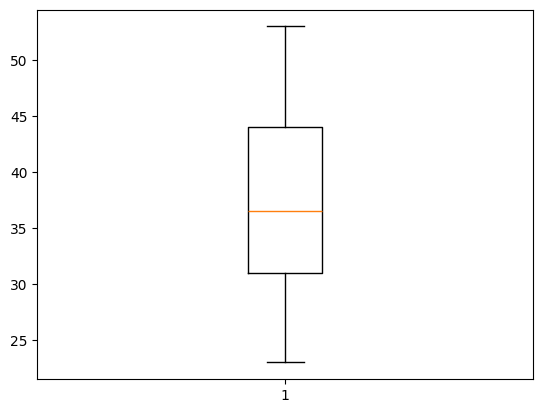

In [13]:
#outlier detection
plt.boxplot(data['Age'])
plt.show()

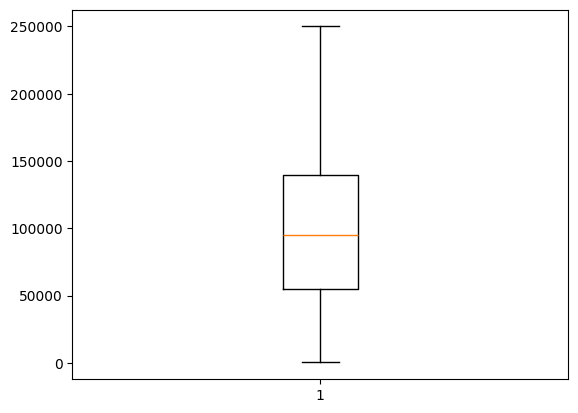

In [16]:
plt.boxplot(data['Salary'])
plt.show()

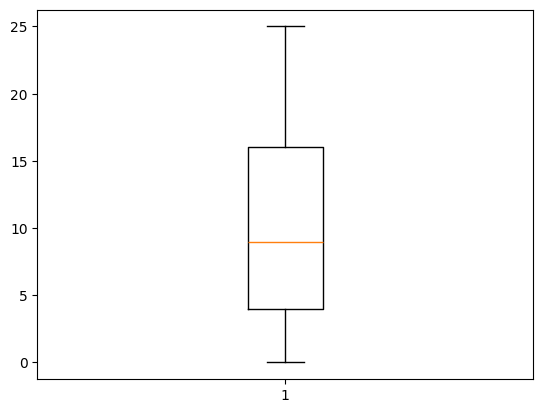

In [17]:
plt.boxplot(data['Experience year'])
plt.show()

In [14]:
print(data.Gender.value_counts())

Gender
Male      170
Female    154
Name: count, dtype: int64


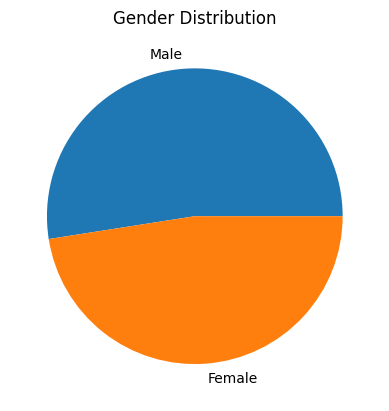

In [19]:
data['Gender'].value_counts().sort_values(ascending= False).plot(kind='pie')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

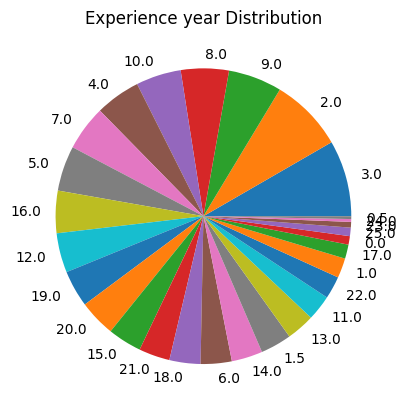

In [20]:
data['Experience year'].value_counts().sort_values(ascending= False).plot(kind='pie')
plt.title('Experience year Distribution')
plt.ylabel('')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [22]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['Gender']=encoder.fit_transform(data['Gender'])
data['Qualification']=encoder.fit_transform(data['Qualification'])
data['Job Title']=encoder.fit_transform(data['Job Title'])
data

,Age,Gender,Qualification,Job Title,Experience year,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,0,0,68,1.0,35000.0
349,36.0,1,0,111,8.0,110000.0
350,44.0,0,2,115,16.0,160000.0
351,31.0,1,0,63,3.0,55000.0


**Building the Machine Learning Model**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [24]:
# Separate features (X) and target (Y)
X = data.drop(columns=['Salary'])  # All columns except Salary
y = data['Salary']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Model Evaluation**

In [25]:
# Predict salaries
y_pred = model.predict(X_test)

In [26]:
# Calculate prediction error
min_abs_err = mean_absolute_error(y_test, y_pred)
print(f'Average Error: {min_abs_err}')

Average Error: 10570.786401136183


The lower the mean absolute error value, the better the model is at predicting employee salaries.

# Testing the Model with New Data

In [32]:
# Testing the model with new data
# Create a DataFrame with the same column names as the training data
new_data = pd.DataFrame([[42, 1, 0, 159, 5]], columns=X_train.columns)

prediction = model.predict(new_data) # Age, Gender, Qualification, Job Title, Years of Experience
print("Predicted Salary:", round(prediction[0]))

Predicted Salary: 94861


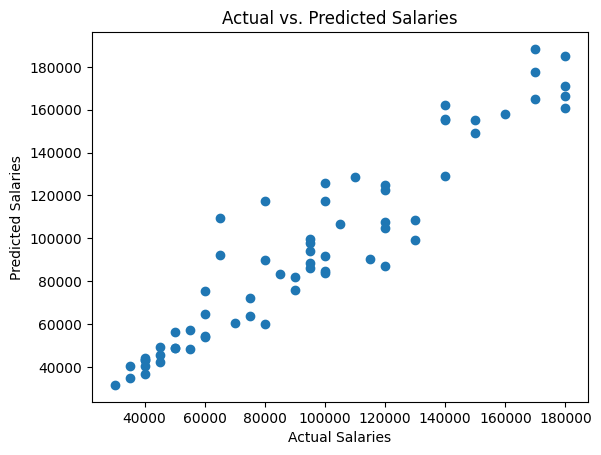

In [31]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs. Predicted Salaries")
plt.show()